In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt.cla import CLA
from pypfopt import plotting
import matplotlib.pyplot as plt

In [26]:
# Fetch historical price data
tickers = ["AAPL", "AMZN", "BAC", "COP", "GOOGL", "PYPL", "SPY", "TSLA", "TSM", "XOM"]
prices = yf.download(tickers, start="2013-05-10", end="2023-05-10")['Adj Close']

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

# Generate a CLA object
cla = CLA(mu, S)

[*********************100%***********************]  10 of 10 completed
Expected annual return: 30.1%
Annual volatility: 28.1%
Sharpe Ratio: 1.00


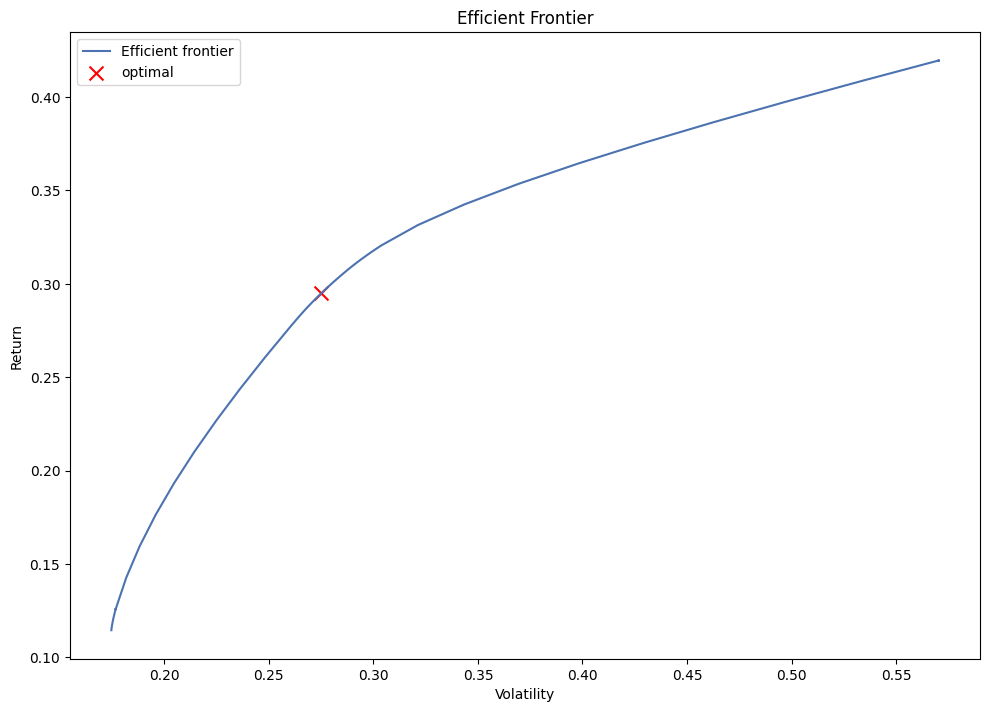

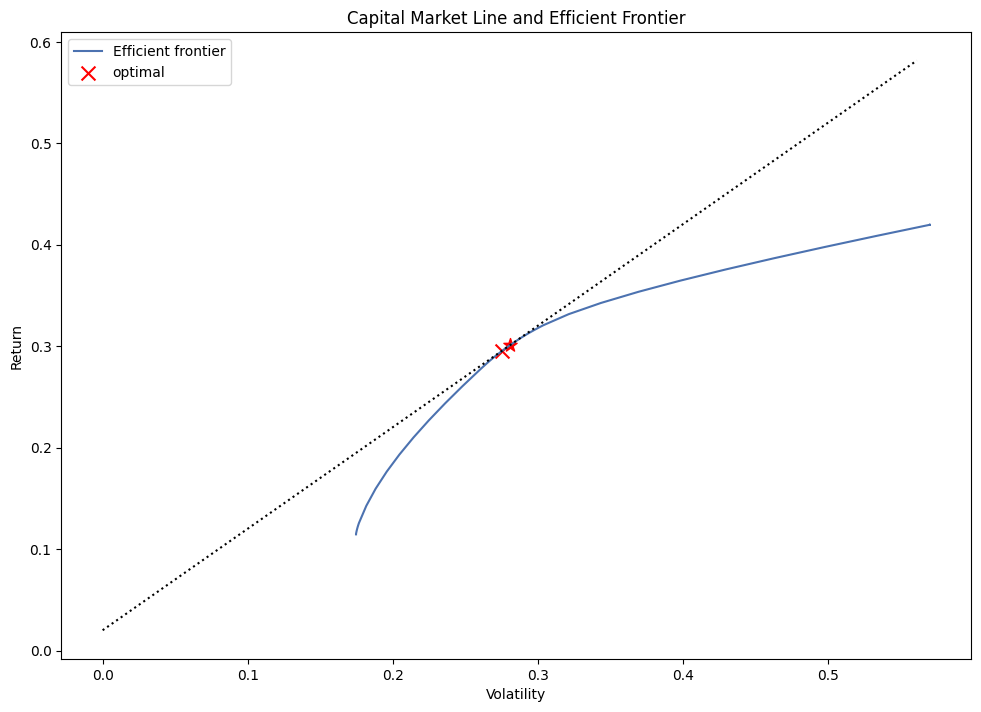


Optimal Investment Strategy:
AAPL: 68.33%
AMZN: 10.47%
BAC: 0.00%
COP: 0.00%
GOOGL: 0.00%
PYPL: 0.00%
SPY: 0.00%
TSLA: 18.04%
TSM: 3.15%
XOM: 0.00%


In [27]:
# Plot efficient frontier
plt.subplots(figsize=(10, 7))
plotting.plot_efficient_frontier(cla, show_assets=False)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

# Risk free rate for CML
risk_free_rate = 0.02

# CML
plt.subplots(figsize=(10, 7))
plotting.plot_efficient_frontier(cla, show_assets=False)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate)
ret_tangent, std_tangent, _ = ef.portfolio_performance()
plt.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Convert the weights to a numpy array
weights = np.array(list(weights.values()))

# Line from risk-free rate to max sharpe portfolio
x_range = np.linspace(0, std_tangent*2, 200)
plt.plot(x_range, risk_free_rate + weights.dot(mu - risk_free_rate)*x_range/std_tangent, color="black", linestyle="dotted", label="Capital Market Line")

plt.title('Capital Market Line and Efficient Frontier')
plt.xlabel('Volatility')
plt.show()

# Print optimal investment strategy
print("\nOptimal Investment Strategy:")
for ticker, weight in cleaned_weights.items():
    print(f"{ticker}: {weight*100:.2f}%")